In [1]:
from utils.make_prompt import collect_prompt

In [2]:
import os

os.getcwd()

'/Users/yeonjoon-mac/Desktop/Workspace/code-diagram'

In [3]:
root_dir = os.getcwd()
target_path = os.path.join(root_dir, "poc")

output_path = os.path.join(root_dir, "output.txt")


In [4]:
collect_prompt(
    root_dir=target_path,
    out_path=output_path,
)

Prompt saved to /Users/yeonjoon-mac/Desktop/Workspace/code-diagram/output.txt


In [5]:
# Check for langsmith

from langchain_openai import ChatOpenAI

llm = ChatOpenAI()
llm.invoke("Hello, world!")

AIMessage(content='Hello! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 10, 'prompt_tokens': 11, 'total_tokens': 21, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-BRdIQPv1A4ps0F13uTOtShgN3tBIK', 'finish_reason': 'stop', 'logprobs': None}, id='run-b549bee6-cc25-4247-ba4a-e23d0e5e85de-0', usage_metadata={'input_tokens': 11, 'output_tokens': 10, 'total_tokens': 21, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [ ]:
llm = ChatOpenAI(
    model="o4-mini-2025-04-16",
    reasoning_effort="medium",
)

from langchain_core.prompts import ChatPromptTemplate, HumanMessagePromptTemplate

collect_prompt = ""
with open("output.txt", "r") as f:
    collect_prompt = f.read()

chat_prompt = ChatPromptTemplate.from_messages(
    [
        HumanMessagePromptTemplate.from_template(
            """
                You are a software engineering expert. You are given a directory structure and codes.
                Please generate a flowchart in mermaid format based on the directory structure and codes.
                
                INPUT:
                Directory structure and codes:
                {collect_prompt}
                
                OUTPUT:
                - Output should be in mermaid format.
                example>
                    ```mermaid
                    flowchart TD
                        %% 노드 정의
                        Start["Start main"]
                        A["nodeA"]
                        B["nodeB"]
                        C["nodeC"]
                        D["nodeD"]
                        Ex["nodeException"]
                        End["End main"]

                        %% 정상 흐름
                        Start --> A
                        A --> B
                        B --> C
                        C --> D
                        D --> End

                        %% 예외 흐름
                        A -- throws --> Ex
                        B -- throws --> Ex
                        C -- throws --> Ex
                        D -- throws --> Ex
                        Ex --> End
                    ```
            """),
    ]
)

messages = chat_prompt.format_messages(collect_prompt=collect_prompt)

response = llm.invoke(messages)

In [7]:
print(response.content)

```mermaid
flowchart TD
    %% 노드 정의
    Start["Start main"]
    A["fetch_data()"]
    B["process_data(data)"]
    C["analyze_data(processed)"]
    D["generate_report(analysis)"]
    Ex["Error in workflow"]
    End["End main"]

    %% 정상 흐름
    Start --> A
    A --> B
    B --> C
    C --> D
    D --> End

    %% 예외 흐름
    A -- throws --> Ex
    B -- throws --> Ex
    C -- throws --> Ex
    D -- throws --> Ex
    Ex --> End
```


In [8]:
pure_mermaid_code = response.content.split("```mermaid")[1].split("```")[0].strip()
print(pure_mermaid_code)

flowchart TD
    %% 노드 정의
    Start["Start main"]
    A["fetch_data()"]
    B["process_data(data)"]
    C["analyze_data(processed)"]
    D["generate_report(analysis)"]
    Ex["Error in workflow"]
    End["End main"]

    %% 정상 흐름
    Start --> A
    A --> B
    B --> C
    C --> D
    D --> End

    %% 예외 흐름
    A -- throws --> Ex
    B -- throws --> Ex
    C -- throws --> Ex
    D -- throws --> Ex
    Ex --> End


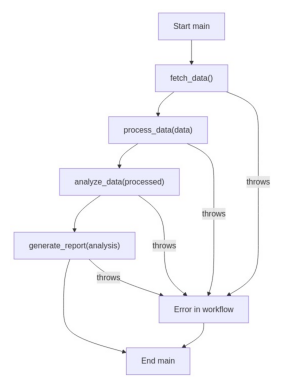

In [9]:
import base64
import io, requests
from IPython.display import Image, display
from PIL import Image as im
import matplotlib.pyplot as plt

def mm(graph):
    graphbytes = graph.encode("utf8")
    base64_bytes = base64.urlsafe_b64encode(graphbytes)
    base64_string = base64_bytes.decode("ascii")
    img = im.open(io.BytesIO(requests.get('https://mermaid.ink/img/' + base64_string).content))
    plt.imshow(img)
    plt.axis('off') # allow to hide axis
    plt.savefig('image.png', dpi=1200)

mm(pure_mermaid_code)

In [9]:
with open("diagram_example.json", "r") as f:
    diagram_example = f.read()

print(diagram_example)

{
    "nodes": [
        {
            "id": "n0",
            "file": "poc/main.py",
            "line_start": 1,
            "line_end": 17,
            "label": "main"
        },
        {
            "id": "n1",
            "file": "poc/fetcher.py",
            "line_start": 1,
            "line_end": 13,
            "label": "fetch_data"
        },
        {
            "id": "n2",
            "file": "poc/processor.py",
            "line_start": 1,
            "line_end": 16,
            "label": "process_data"
        }
    ],
    "edges": [
        {
            "id": "e0",
            "source": "n0",
            "target": "n1",
            "type": "call"
        },
        {
            "id": "e1",
            "source": "n0",
            "target": "n2",
            "type": "call"
        }
    ]
}
